In [1]:
import pandas as pd

In [2]:
nyc=pd.read_csv('ave_hi_nyc_jan_1895-2018.csv.xls', header='infer')

In [3]:
nyc

,Date,Value,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9
3,189801,39.6,2.2
4,189901,36.4,-1.0
...,...,...,...
119,201401,35.5,-1.9
120,201501,36.1,-1.3
121,201601,40.8,3.4
122,201701,42.8,5.4


In [4]:
nyc.columns

Index(['Date', 'Value', 'Anomaly'], dtype='object')

In [5]:
nyc.head(4)

,Date,Value,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9
3,189801,39.6,2.2


In [6]:
nyc.sample(8)
nyc.tail(4)

,Date,Value,Anomaly
120,201501,36.1,-1.3
121,201601,40.8,3.4
122,201701,42.8,5.4
123,201801,38.7,1.3


In [7]:
nyc.shape

(124, 3)

In [8]:
nyc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     124 non-null    int64  
 1   Value    124 non-null    float64
 2   Anomaly  124 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 3.0 KB


In [9]:
nyc.Date=nyc.Date.floordiv(100)

In [10]:
nyc.head(10)

,Date,Value,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9
3,1898,39.6,2.2
4,1899,36.4,-1.0
5,1900,37.4,0.0
6,1901,37.0,-0.4
7,1902,35.0,-2.4
8,1903,35.5,-1.9
9,1904,29.8,-7.6


In [11]:
from sklearn.model_selection import train_test_split

In [12]:
nyc['Date'].values

array([1895, 1896, 1897, 1898, 1899, 1900, 1901, 1902, 1903, 1904, 1905,
       1906, 1907, 1908, 1909, 1910, 1911, 1912, 1913, 1914, 1915, 1916,
       1917, 1918, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927,
       1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938,
       1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949,
       1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960,
       1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
       1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982,
       1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
       1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
       2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       2016, 2017, 2018])

In [13]:
type(nyc['Date'].values)

numpy.ndarray

In [14]:
import numpy as np

In [15]:
m=np.linspace(1,5,10)
m

array([1.        , 1.44444444, 1.88888889, 2.33333333, 2.77777778,
       3.22222222, 3.66666667, 4.11111111, 4.55555556, 5.        ])

In [16]:
m.shape

(10,)

In [18]:
m.reshape(-1,1).shape

(10, 1)

In [20]:
print(nyc.columns)

Index(['Date', 'Value', 'Anomaly'], dtype='object')


In [21]:
X_train, X_test, y_train, y_test = train_test_split(nyc.Date.values.reshape(-1, 1), nyc.Value.values, test_size=0.25, random_state=11)


In [22]:
X_train.shape

(93, 1)

In [23]:
X_test.shape

(31, 1)

In [24]:
X_train[0]

array([1996])

In [25]:
y_train[0]

37.0

In [26]:
from sklearn.linear_model import LinearRegression

In [28]:
linear_regression=LinearRegression()
linear_regression

LinearRegression()

In [29]:
linear_regression.fit(X=X_train, y=y_train)

LinearRegression()

In [30]:
linear_regression.coef_

array([0.01939167])

In [31]:
linear_regression.intercept_

-0.30779820252656265

In [32]:
0.01939167*2024 -0.30779820252656975

38.94094187747343

In [33]:
predicted=linear_regression.predict(X_test)
predicted

array([37.85501484, 36.47820604, 37.93258153, 36.61394775, 36.74968946,
       38.68885679, 36.43942269, 37.13752293, 37.62231476, 37.5253564 ,
       37.00178122, 38.320415  , 37.19569795, 38.45615671, 36.55577273,
       37.25387297, 38.18467329, 37.89379819, 38.14588994, 38.63068177,
       38.04893157, 37.02117289, 37.11813126, 37.69988146, 36.73029779,
       37.64170644, 37.56413974, 38.10710659, 36.8660395 , 36.84664783,
       36.9436062 ])

In [34]:
expected=y_test

In [35]:
expected

array([31.7, 35.5, 40.5, 29.8, 40.7, 34.8, 34.2, 38.2, 36.2, 42.5, 39.4,
       40.9, 39.8, 40.8, 37. , 45.7, 33. , 29.9, 38. , 42.4, 32.3, 33.8,
       38.5, 37.8, 36.1, 33.8, 42.4, 30.6, 38.4, 42.3, 39.7])

In [36]:
for p, e in zip(predicted[::],expected[::]):
    print(f'predicted: {p:.2f}, expected: {e:.2f}')

predicted: 37.86, expected: 31.70
predicted: 36.48, expected: 35.50
predicted: 37.93, expected: 40.50
predicted: 36.61, expected: 29.80
predicted: 36.75, expected: 40.70
predicted: 38.69, expected: 34.80
predicted: 36.44, expected: 34.20
predicted: 37.14, expected: 38.20
predicted: 37.62, expected: 36.20
predicted: 37.53, expected: 42.50
predicted: 37.00, expected: 39.40
predicted: 38.32, expected: 40.90
predicted: 37.20, expected: 39.80
predicted: 38.46, expected: 40.80
predicted: 36.56, expected: 37.00
predicted: 37.25, expected: 45.70
predicted: 38.18, expected: 33.00
predicted: 37.89, expected: 29.90
predicted: 38.15, expected: 38.00
predicted: 38.63, expected: 42.40
predicted: 38.05, expected: 32.30
predicted: 37.02, expected: 33.80
predicted: 37.12, expected: 38.50
predicted: 37.70, expected: 37.80
predicted: 36.73, expected: 36.10
predicted: 37.64, expected: 33.80
predicted: 37.56, expected: 42.40
predicted: 38.11, expected: 30.60
predicted: 36.87, expected: 38.40
predicted: 36.

In [37]:
predict=(lambda date: linear_regression.coef_ * date + linear_regression.intercept_)

In [38]:
def computerTemp(date):
    return linear_regression.coef_*date+linear_regression.intercept_

In [39]:
computerTemp(2024)

array([38.94094855])

In [40]:
import math
from sklearn.metrics import mean_squared_error

In [41]:
mse= mean_squared_error( expected, predicted)
rmse = math.sqrt(mse)

In [42]:
rmse

4.160742885627115

In [43]:
import seaborn as sns

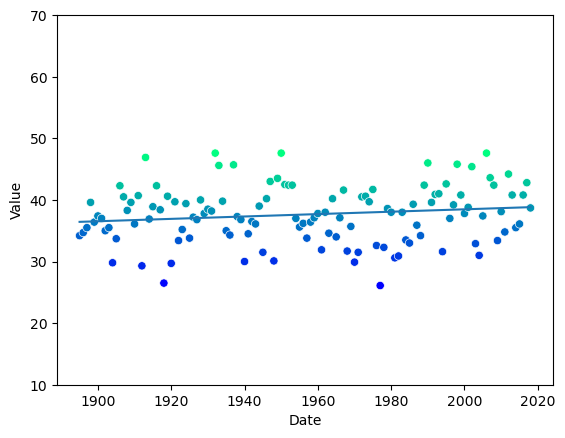

In [45]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Scatter plot
axes = sns.scatterplot(data=nyc, x='Date', y='Value', hue='Value', palette='winter', legend=False)
axes.set_ylim(10, 70)

# Predict values
x = np.array((min(nyc.Date.values), max(nyc.Date.values)))
y = predict(x)

# Plot the prediction line
line = plt.plot(x, y)
plt.show()
